In [95]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [96]:
# importation des différents fichiers dans l'environnement 

X_train_away_player = pd.read_csv("Train_Data/train_away_player_statistics_df.csv", index_col=0)
X_train_away_team = pd.read_csv("Train_Data/train_away_team_statistics_df.csv", index_col=0)
X_train_home_player = pd.read_csv("Train_Data/train_home_player_statistics_df.csv", index_col=0)
X_train_home_team = pd.read_csv("Train_Data/train_home_team_statistics_df.csv", index_col=0)

X_test_away_player = pd.read_csv("Test_Data/test_away_player_statistics_df.csv", index_col=0)
X_test_away_team = pd.read_csv("Test_Data/test_away_team_statistics_df.csv", index_col=0)
X_test_home_player = pd.read_csv("Test_Data/test_home_player_statistics_df.csv", index_col=0)
X_test_home_team = pd.read_csv("Test_Data/test_home_team_statistics_df.csv", index_col=0)

y_train = pd.read_csv("Y_train_1rknArQ.csv", index_col=0)
y_train_sup = pd.read_csv("benchmark_and_extras/Y_train_supp.csv", index_col=0)

In [97]:
X_train_home_team

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,League One,Southend United,4.0,2.0,3.0,4.0,7.0,4.0,4.0,3.0,...,4.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0,NaN,4.0
12299,Liga Portugal,Boavista,4.0,2.0,3.0,1.0,5.0,1.0,1.0,9.0,...,6.0,10.0,7.0,2.0,0.0,0.0,3.0,10.0,6.0,1.0
12300,Bundesliga,Schalke 04,4.0,3.0,5.0,3.0,5.0,1.0,1.0,6.0,...,7.0,8.0,0.0,7.0,0.0,0.0,3.0,1.0,3.0,2.0


In [98]:
X_train_home_player.head()

,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,0.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,NaN,Efthymios Koulouris,2.0,23.0,27.0,14.0,8.0,37.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN


In [99]:
X_test_home_player.select_dtypes(['object']).head()

,POSITION
ID,
12303,goalkeeper
12303,goalkeeper
12303,defender
12303,defender
12303,defender


In [100]:
X_test_home_player.head()

,POSITION,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,7.0,...,63.0,0.0,0.0,0.0,0.0,50.0,25.0,NaN,NaN,NaN
12303,goalkeeper,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,...,63.0,0.0,0.0,0.0,3.0,0.0,20.0,NaN,NaN,NaN
12303,defender,48.0,29.0,13.0,20.0,14.0,0.0,5.0,NaN,7.0,...,63.0,14.0,87.0,25.0,61.0,0.0,0.0,NaN,NaN,NaN
12303,defender,0.0,42.0,11.0,0.0,0.0,0.0,17.0,NaN,23.0,...,77.0,14.0,17.0,0.0,34.0,50.0,0.0,NaN,NaN,NaN
12303,defender,0.0,70.0,23.0,20.0,14.0,11.0,47.0,57.0,52.0,...,0.0,0.0,23.0,0.0,16.0,50.0,0.0,NaN,NaN,NaN


In [101]:
train_home = X_train_home_team.iloc[:,2:]
train_away = X_train_away_team.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

X_test_home_team.columns = 'HOME_' + X_test_home_team.columns
X_test_away_team.columns = 'AWAY_' + X_test_away_team.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1)
test_data =  pd.concat([X_test_home_team,X_test_away_team],join='inner',axis=1)

train_scores = y_train_sup.loc[train_data.index]
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12303 entries, 0 to 12302
Columns: 280 entries, HOME_TEAM_SHOTS_TOTAL_season_sum to AWAY_TEAM_GOALS_5_last_match_std
dtypes: float64(280)
memory usage: 26.6 MB


**Modèle 1 :** Classification similaire au benchmark en se servant uniquement des 3 états  => on obtient des résultats qui semblent légérement meilleurs que ceux du benchmark 

In [103]:
# Cible : encoder en classes 0, 1, 2
y_train['target'] = y_train[['HOME_WINS', 'DRAW', 'AWAY_WINS']].idxmax(axis=1).map({'HOME_WINS': 2, 'DRAW': 1, 'AWAY_WINS': 0})

In [104]:
train_new_y = y_train['target']

In [105]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [106]:
y_train

ID
10848    0
4722     1
854      2
6445     2
9102     2
        ..
11467    1
10736    2
5300     2
6378     2
10052    1
Name: target, Length: 7873, dtype: int64

In [107]:
# Créer les matrices pour XGBoost
d_train = xgb.DMatrix(X_train, y_train)  
d_valid = xgb.DMatrix(X_valid, y_valid) 
d_test = xgb.DMatrix(X_test,y_test)             # N'inclut PAS 'HOME_AWAY_DIFF'
num_round = 10000
# Entraîner le modèle
params_1 = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 8,
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss'
}
evallist = [(d_train, 'train'), (d_valid, 'eval')]

bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)


[0]	train-mlogloss:1.08881	eval-mlogloss:1.09578
[1]	train-mlogloss:1.07885	eval-mlogloss:1.09272
[2]	train-mlogloss:1.06945	eval-mlogloss:1.09005
[3]	train-mlogloss:1.05982	eval-mlogloss:1.08719
[4]	train-mlogloss:1.05077	eval-mlogloss:1.08478
[5]	train-mlogloss:1.04198	eval-mlogloss:1.08239
[6]	train-mlogloss:1.03342	eval-mlogloss:1.08011
[7]	train-mlogloss:1.02514	eval-mlogloss:1.07806
[8]	train-mlogloss:1.01673	eval-mlogloss:1.07601
[9]	train-mlogloss:1.00870	eval-mlogloss:1.07398
[10]	train-mlogloss:1.00086	eval-mlogloss:1.07224
[11]	train-mlogloss:0.99329	eval-mlogloss:1.07023
[12]	train-mlogloss:0.98551	eval-mlogloss:1.06859
[13]	train-mlogloss:0.97833	eval-mlogloss:1.06665
[14]	train-mlogloss:0.97066	eval-mlogloss:1.06501
[15]	train-mlogloss:0.96355	eval-mlogloss:1.06315
[16]	train-mlogloss:0.95680	eval-mlogloss:1.06186
[17]	train-mlogloss:0.94986	eval-mlogloss:1.06008
[18]	train-mlogloss:0.94311	eval-mlogloss:1.05868
[19]	train-mlogloss:0.93649	eval-mlogloss:1.05726
[20]	train

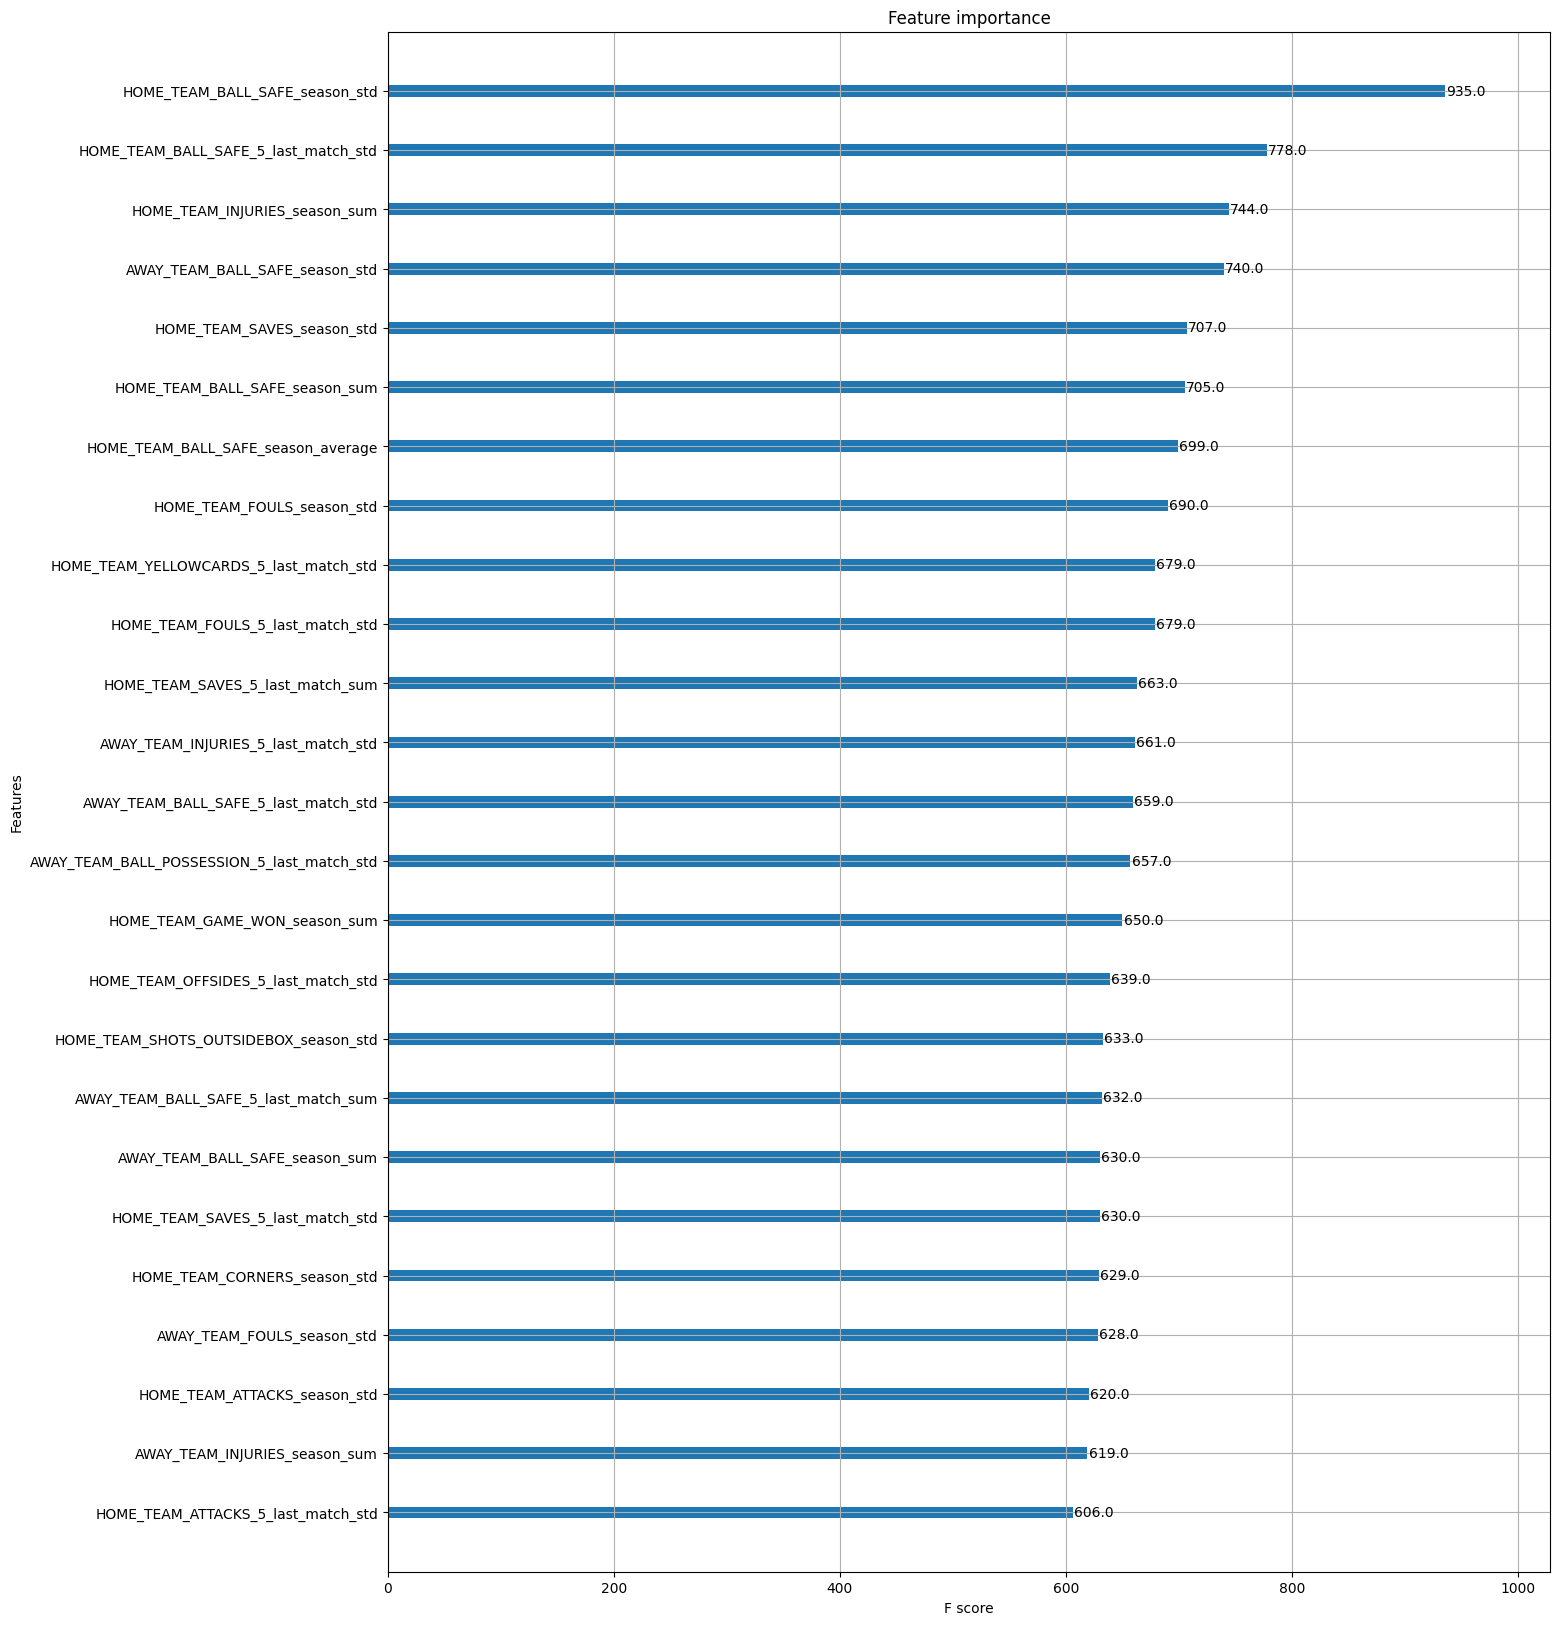

In [108]:
xgb.plot_importance(bst, max_num_features=25)
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [109]:
importance = bst.get_score(importance_type='weight')
print(importance)

{'HOME_TEAM_SHOTS_TOTAL_season_sum': 555.0, 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum': 495.0, 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum': 513.0, 'HOME_TEAM_SHOTS_ON_TARGET_season_sum': 391.0, 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum': 489.0, 'HOME_TEAM_PASSES_season_sum': 327.0, 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum': 171.0, 'HOME_TEAM_SAVES_season_sum': 528.0, 'HOME_TEAM_CORNERS_season_sum': 501.0, 'HOME_TEAM_FOULS_season_sum': 553.0, 'HOME_TEAM_YELLOWCARDS_season_sum': 573.0, 'HOME_TEAM_REDCARDS_season_sum': 457.0, 'HOME_TEAM_OFFSIDES_season_sum': 555.0, 'HOME_TEAM_ATTACKS_season_sum': 510.0, 'HOME_TEAM_PENALTIES_season_sum': 438.0, 'HOME_TEAM_SUBSTITUTIONS_season_sum': 536.0, 'HOME_TEAM_BALL_SAFE_season_sum': 705.0, 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum': 470.0, 'HOME_TEAM_INJURIES_season_sum': 744.0, 'HOME_TEAM_GOALS_season_sum': 385.0, 'HOME_TEAM_GAME_WON_season_sum': 650.0, 'HOME_TEAM_GAME_DRAW_season_sum': 488.0, 'HOME_TEAM_GAME_LOST_season_sum': 514.0, 'HOME_TEAM_SHOTS_TOTAL_season

In [110]:
#accuracy preview 
X_accuracy= xgb.DMatrix(X_test)
predictions_acc = bst.predict(X_accuracy, iteration_range=(0, bst.best_iteration))
predictions_acc = pd.DataFrame(predictions_acc)
predictions_acc = (predictions_acc.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)
predictions_acc['target']= predictions_acc.idxmax(axis=1)
predictions_acc = predictions_acc['target']
np.round(accuracy_score(y_test,predictions_acc),4)

0.4876

In [210]:
X_bench = xgb.DMatrix(test_data)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)


predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions

ValueError: feature_names mismatch: ['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_PENALTIES_season_sum', 'HOME_TEAM_SUBSTITUTIONS_season_sum', 'HOME_TEAM_BALL_SAFE_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_INJURIES_season_sum', 'HOME_TEAM_GOALS_season_sum', 'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_DRAW_season_sum', 'HOME_TEAM_GAME_LOST_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_BALL_SAFE_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_INJURIES_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_REDCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_ATTACKS_season_std', 'HOME_TEAM_PENALTIES_season_std', 'HOME_TEAM_SUBSTITUTIONS_season_std', 'HOME_TEAM_BALL_SAFE_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_INJURIES_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_FOULS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_REDCARDS_5_last_match_sum', 'HOME_TEAM_OFFSIDES_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_PENALTIES_5_last_match_sum', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_sum', 'HOME_TEAM_BALL_SAFE_5_last_match_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'HOME_TEAM_INJURIES_5_last_match_sum', 'HOME_TEAM_GOALS_5_last_match_sum', 'HOME_TEAM_GAME_WON_5_last_match_sum', 'HOME_TEAM_GAME_DRAW_5_last_match_sum', 'HOME_TEAM_GAME_LOST_5_last_match_sum', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_average', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_BALL_POSSESSION_5_last_match_average', 'HOME_TEAM_FOULS_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_REDCARDS_5_last_match_average', 'HOME_TEAM_OFFSIDES_5_last_match_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_PENALTIES_5_last_match_average', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_average', 'HOME_TEAM_BALL_SAFE_5_last_match_average', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'HOME_TEAM_INJURIES_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_FOULS_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_REDCARDS_5_last_match_std', 'HOME_TEAM_OFFSIDES_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'HOME_TEAM_PENALTIES_5_last_match_std', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_std', 'HOME_TEAM_BALL_SAFE_5_last_match_std', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'HOME_TEAM_INJURIES_5_last_match_std', 'HOME_TEAM_GOALS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_SAVES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_FOULS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_REDCARDS_season_sum', 'AWAY_TEAM_OFFSIDES_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_PENALTIES_season_sum', 'AWAY_TEAM_SUBSTITUTIONS_season_sum', 'AWAY_TEAM_BALL_SAFE_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_INJURIES_season_sum', 'AWAY_TEAM_GOALS_season_sum', 'AWAY_TEAM_GAME_WON_season_sum', 'AWAY_TEAM_GAME_DRAW_season_sum', 'AWAY_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_BALL_POSSESSION_season_average', 'AWAY_TEAM_FOULS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_REDCARDS_season_average', 'AWAY_TEAM_OFFSIDES_season_average', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_PENALTIES_season_average', 'AWAY_TEAM_SUBSTITUTIONS_season_average', 'AWAY_TEAM_BALL_SAFE_season_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_average', 'AWAY_TEAM_INJURIES_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_std', 'AWAY_TEAM_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_SAVES_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_BALL_POSSESSION_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_REDCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_ATTACKS_season_std', 'AWAY_TEAM_PENALTIES_season_std', 'AWAY_TEAM_SUBSTITUTIONS_season_std', 'AWAY_TEAM_BALL_SAFE_season_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_std', 'AWAY_TEAM_INJURIES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_PASSES_5_last_match_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'AWAY_TEAM_SAVES_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_FOULS_5_last_match_sum', 'AWAY_TEAM_YELLOWCARDS_5_last_match_sum', 'AWAY_TEAM_REDCARDS_5_last_match_sum', 'AWAY_TEAM_OFFSIDES_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_PENALTIES_5_last_match_sum', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_sum', 'AWAY_TEAM_BALL_SAFE_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_INJURIES_5_last_match_sum', 'AWAY_TEAM_GOALS_5_last_match_sum', 'AWAY_TEAM_GAME_WON_5_last_match_sum', 'AWAY_TEAM_GAME_DRAW_5_last_match_sum', 'AWAY_TEAM_GAME_LOST_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_CORNERS_5_last_match_average', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_average', 'AWAY_TEAM_FOULS_5_last_match_average', 'AWAY_TEAM_YELLOWCARDS_5_last_match_average', 'AWAY_TEAM_REDCARDS_5_last_match_average', 'AWAY_TEAM_OFFSIDES_5_last_match_average', 'AWAY_TEAM_ATTACKS_5_last_match_average', 'AWAY_TEAM_PENALTIES_5_last_match_average', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_average', 'AWAY_TEAM_BALL_SAFE_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_INJURIES_5_last_match_average', 'AWAY_TEAM_GOALS_5_last_match_average', 'AWAY_TEAM_GAME_WON_5_last_match_average', 'AWAY_TEAM_GAME_DRAW_5_last_match_average', 'AWAY_TEAM_GAME_LOST_5_last_match_average', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'AWAY_TEAM_SAVES_5_last_match_std', 'AWAY_TEAM_CORNERS_5_last_match_std', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_std', 'AWAY_TEAM_FOULS_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_REDCARDS_5_last_match_std', 'AWAY_TEAM_OFFSIDES_5_last_match_std', 'AWAY_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_std', 'AWAY_TEAM_BALL_SAFE_5_last_match_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'AWAY_TEAM_INJURIES_5_last_match_std', 'AWAY_TEAM_GOALS_5_last_match_std'] ['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_PENALTIES_season_sum', 'HOME_TEAM_SUBSTITUTIONS_season_sum', 'HOME_TEAM_BALL_SAFE_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_INJURIES_season_sum', 'HOME_TEAM_GOALS_season_sum', 'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_DRAW_season_sum', 'HOME_TEAM_GAME_LOST_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_BALL_SAFE_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_INJURIES_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_REDCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_ATTACKS_season_std', 'HOME_TEAM_PENALTIES_season_std', 'HOME_TEAM_SUBSTITUTIONS_season_std', 'HOME_TEAM_BALL_SAFE_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_INJURIES_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_FOULS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_REDCARDS_5_last_match_sum', 'HOME_TEAM_OFFSIDES_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_PENALTIES_5_last_match_sum', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_sum', 'HOME_TEAM_BALL_SAFE_5_last_match_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'HOME_TEAM_INJURIES_5_last_match_sum', 'HOME_TEAM_GOALS_5_last_match_sum', 'HOME_TEAM_GAME_WON_5_last_match_sum', 'HOME_TEAM_GAME_DRAW_5_last_match_sum', 'HOME_TEAM_GAME_LOST_5_last_match_sum', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_average', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_BALL_POSSESSION_5_last_match_average', 'HOME_TEAM_FOULS_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_REDCARDS_5_last_match_average', 'HOME_TEAM_OFFSIDES_5_last_match_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_PENALTIES_5_last_match_average', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_average', 'HOME_TEAM_BALL_SAFE_5_last_match_average', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'HOME_TEAM_INJURIES_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_FOULS_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_REDCARDS_5_last_match_std', 'HOME_TEAM_OFFSIDES_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'HOME_TEAM_PENALTIES_5_last_match_std', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_std', 'HOME_TEAM_BALL_SAFE_5_last_match_std', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'HOME_TEAM_INJURIES_5_last_match_std', 'HOME_TEAM_GOALS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_SAVES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_FOULS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_REDCARDS_season_sum', 'AWAY_TEAM_OFFSIDES_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_PENALTIES_season_sum', 'AWAY_TEAM_SUBSTITUTIONS_season_sum', 'AWAY_TEAM_BALL_SAFE_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_INJURIES_season_sum', 'AWAY_TEAM_GOALS_season_sum', 'AWAY_TEAM_GAME_WON_season_sum', 'AWAY_TEAM_GAME_DRAW_season_sum', 'AWAY_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_BALL_POSSESSION_season_average', 'AWAY_TEAM_FOULS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_REDCARDS_season_average', 'AWAY_TEAM_OFFSIDES_season_average', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_PENALTIES_season_average', 'AWAY_TEAM_SUBSTITUTIONS_season_average', 'AWAY_TEAM_BALL_SAFE_season_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_average', 'AWAY_TEAM_INJURIES_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_std', 'AWAY_TEAM_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_SAVES_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_BALL_POSSESSION_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_REDCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_ATTACKS_season_std', 'AWAY_TEAM_PENALTIES_season_std', 'AWAY_TEAM_SUBSTITUTIONS_season_std', 'AWAY_TEAM_BALL_SAFE_season_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_std', 'AWAY_TEAM_INJURIES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_PASSES_5_last_match_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'AWAY_TEAM_SAVES_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_FOULS_5_last_match_sum', 'AWAY_TEAM_YELLOWCARDS_5_last_match_sum', 'AWAY_TEAM_REDCARDS_5_last_match_sum', 'AWAY_TEAM_OFFSIDES_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_PENALTIES_5_last_match_sum', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_sum', 'AWAY_TEAM_BALL_SAFE_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_INJURIES_5_last_match_sum', 'AWAY_TEAM_GOALS_5_last_match_sum', 'AWAY_TEAM_GAME_WON_5_last_match_sum', 'AWAY_TEAM_GAME_DRAW_5_last_match_sum', 'AWAY_TEAM_GAME_LOST_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_CORNERS_5_last_match_average', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_average', 'AWAY_TEAM_FOULS_5_last_match_average', 'AWAY_TEAM_YELLOWCARDS_5_last_match_average', 'AWAY_TEAM_REDCARDS_5_last_match_average', 'AWAY_TEAM_OFFSIDES_5_last_match_average', 'AWAY_TEAM_ATTACKS_5_last_match_average', 'AWAY_TEAM_PENALTIES_5_last_match_average', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_average', 'AWAY_TEAM_BALL_SAFE_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_INJURIES_5_last_match_average', 'AWAY_TEAM_GOALS_5_last_match_average', 'AWAY_TEAM_GAME_WON_5_last_match_average', 'AWAY_TEAM_GAME_DRAW_5_last_match_average', 'AWAY_TEAM_GAME_LOST_5_last_match_average', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'AWAY_TEAM_SAVES_5_last_match_std', 'AWAY_TEAM_CORNERS_5_last_match_std', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_std', 'AWAY_TEAM_FOULS_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_REDCARDS_5_last_match_std', 'AWAY_TEAM_OFFSIDES_5_last_match_std', 'AWAY_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_std', 'AWAY_TEAM_BALL_SAFE_5_last_match_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'AWAY_TEAM_INJURIES_5_last_match_std', 'AWAY_TEAM_GOALS_5_last_match_std', 'HOME_AWAY_DIFF']
training data did not have the following fields: HOME_AWAY_DIFF

In [217]:
predictions['ID'] = test_data.index
predictions.set_index('ID',inplace= True)
predictions.to_csv("Soumission2_classi3.csv")

**Modèle 2** : On va cette fois ci s'interesser au score des match précédent et essayer de prévoir quelque chose de plus fort que victoire/ défaite à savoir le nombre de point d'écart, et on en déduira le résultat du match 

In [112]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, y_train_sup, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [113]:
# 1. Modèle régressif pour HOME_AWAY_DIFF
regressor_params = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 6,
    'learning_rate': 0.05,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

d_train_reg = xgb.DMatrix(train_data, y_train_sup)
d_valid_reg = xgb.DMatrix(X_valid, y_valid)

regressor = xgb.train(
    regressor_params,
    d_train_reg,
    num_boost_round=500,
    early_stopping_rounds=50,
    evals=[(d_train_reg, 'train'), (d_valid_reg, 'eval')]
)


d_test_reg = xgb.DMatrix(test_data)
test_data['HOME_AWAY_DIFF'] = regressor.predict(d_test_reg)


[0]	train-rmse:1.72953	eval-rmse:1.71575
[1]	train-rmse:1.71585	eval-rmse:1.70131
[2]	train-rmse:1.70279	eval-rmse:1.68784
[3]	train-rmse:1.69080	eval-rmse:1.67468
[4]	train-rmse:1.67923	eval-rmse:1.66267
[5]	train-rmse:1.66777	eval-rmse:1.65003
[6]	train-rmse:1.65706	eval-rmse:1.63844
[7]	train-rmse:1.64697	eval-rmse:1.62780
[8]	train-rmse:1.63745	eval-rmse:1.61780
[9]	train-rmse:1.62841	eval-rmse:1.60841
[10]	train-rmse:1.61988	eval-rmse:1.59921
[11]	train-rmse:1.61149	eval-rmse:1.59007
[12]	train-rmse:1.60333	eval-rmse:1.58055
[13]	train-rmse:1.59583	eval-rmse:1.57268
[14]	train-rmse:1.58841	eval-rmse:1.56448
[15]	train-rmse:1.58134	eval-rmse:1.55664
[16]	train-rmse:1.57443	eval-rmse:1.54935
[17]	train-rmse:1.56795	eval-rmse:1.54211
[18]	train-rmse:1.56164	eval-rmse:1.53521
[19]	train-rmse:1.55582	eval-rmse:1.52848
[20]	train-rmse:1.54974	eval-rmse:1.52223
[21]	train-rmse:1.54422	eval-rmse:1.51676
[22]	train-rmse:1.53863	eval-rmse:1.51115
[23]	train-rmse:1.53301	eval-rmse:1.50536
[2

In [114]:
test_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std,HOME_AWAY_DIFF
ID,,,,,,,,,,,,,,,,,,,,,
12303,3.0,6.0,5.0,1.0,3.0,9.0,8.0,10.0,6.0,7.0,...,0.0,1.0,4.0,0.0,8.0,7.0,2.0,7.0,0.0,0.462606
12304,3.0,2.0,4.0,2.0,6.0,1.0,1.0,2.0,4.0,10.0,...,0.0,3.0,6.0,8.0,5.0,1.0,1.0,7.0,9.0,-1.131760
12305,7.0,10.0,8.0,8.0,1.0,4.0,5.0,0.0,10.0,4.0,...,0.0,0.0,2.0,0.0,4.0,2.0,3.0,NaN,9.0,1.705799
12306,5.0,7.0,5.0,9.0,5.0,7.0,6.0,3.0,5.0,8.0,...,5.0,4.0,5.0,10.0,9.0,6.0,9.0,7.0,3.0,0.390205
12307,5.0,4.0,6.0,3.0,5.0,0.0,0.0,2.0,2.0,9.0,...,0.0,6.0,5.0,0.0,4.0,3.0,10.0,3.0,1.0,-0.720837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,5.0,5.0,5.0,5.0,7.0,6.0,6.0,4.0,6.0,8.0,...,0.0,5.0,4.0,5.0,0.0,3.0,10.0,5.0,10.0,-0.323345
37667,5.0,5.0,2.0,8.0,3.0,7.0,7.0,2.0,2.0,2.0,...,5.0,6.0,6.0,8.0,0.0,3.0,5.0,1.0,0.0,0.228022
37668,10.0,10.0,10.0,8.0,8.0,5.0,5.0,2.0,6.0,0.0,...,0.0,0.0,5.0,0.0,3.0,NaN,3.0,NaN,1.0,1.061391


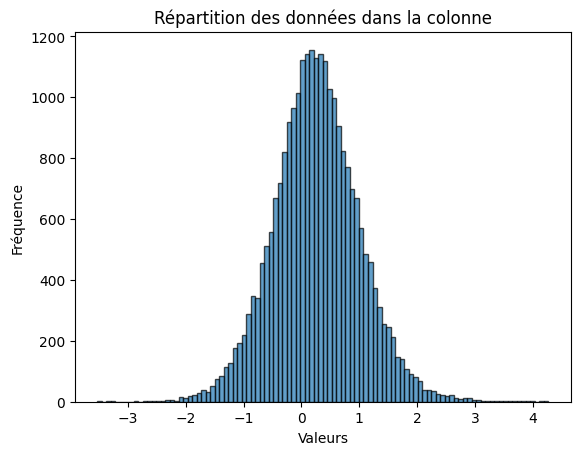

In [121]:
plt.hist(test_data['HOME_AWAY_DIFF'], bins=100, edgecolor='k', alpha=0.7)
plt.title("Répartition des données dans la colonne")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()

In [150]:
true_proportion = train_new_y[(train_new_y == 1)].count()/len(train_new_y)

In [142]:
d_train_reg = xgb.DMatrix(train_data)
train_data['HOME_AWAY_DIFF'] = regressor.predict(d_train_reg)

In [156]:
## on veut fixer un seuil pour lequel on estimera qu'il y a match nul pour cela on se base 
# sur le fait que la proportion prédite sur le jeu d'entrainement doit rester la même

def dichotomy_method(f, a, b, true_proportion, tol=1e-6, max_iter=100):
    if f(a,true_proportion) * f(b,true_proportion) >= 0:
        raise ValueError("La fonction doit changer de signe sur l'intervalle [a, b].")
        print(f"Début de la recherche dans l'intervalle [{a}, {b}]")

    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c,true_proportion)

        # Vérification de convergence
        if abs(fc) < tol or abs(b - a) / 2 < tol:
            return c

        # Mise à jour des bornes
        if f(a,true_proportion) * fc < 0:
            b = c
        else:
            a = c

    print("Nombre maximum d'itérations atteint sans convergence.")
    return c

def fonction_quantile(alpha,true_proportion): 
    dans_intervalle = test_data[(test_data['HOME_AWAY_DIFF'] >= -alpha) & (test_data['HOME_AWAY_DIFF'] <= alpha)]  # Filtrer les données dans [-alpha, +alpha]
    proportion = len(dans_intervalle) / len(test_data)  #
    return (proportion - true_proportion )
    
alpha = dichotomy_method(fonction_quantile, 0, 1, true_proportion, tol=1e-4, max_iter=100)
alpha

0.2413330078125

In [161]:
test_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std,HOME_AWAY_DIFF
ID,,,,,,,,,,,,,,,,,,,,,
12303,3.0,6.0,5.0,1.0,3.0,9.0,8.0,10.0,6.0,7.0,...,0.0,1.0,4.0,0.0,8.0,7.0,2.0,7.0,0.0,0.462606
12304,3.0,2.0,4.0,2.0,6.0,1.0,1.0,2.0,4.0,10.0,...,0.0,3.0,6.0,8.0,5.0,1.0,1.0,7.0,9.0,-1.131760
12305,7.0,10.0,8.0,8.0,1.0,4.0,5.0,0.0,10.0,4.0,...,0.0,0.0,2.0,0.0,4.0,2.0,3.0,NaN,9.0,1.705799
12306,5.0,7.0,5.0,9.0,5.0,7.0,6.0,3.0,5.0,8.0,...,5.0,4.0,5.0,10.0,9.0,6.0,9.0,7.0,3.0,0.390205
12307,5.0,4.0,6.0,3.0,5.0,0.0,0.0,2.0,2.0,9.0,...,0.0,6.0,5.0,0.0,4.0,3.0,10.0,3.0,1.0,-0.720837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,5.0,5.0,5.0,5.0,7.0,6.0,6.0,4.0,6.0,8.0,...,0.0,5.0,4.0,5.0,0.0,3.0,10.0,5.0,10.0,-0.323345
37667,5.0,5.0,2.0,8.0,3.0,7.0,7.0,2.0,2.0,2.0,...,5.0,6.0,6.0,8.0,0.0,3.0,5.0,1.0,0.0,0.228022
37668,10.0,10.0,10.0,8.0,8.0,5.0,5.0,2.0,6.0,0.0,...,0.0,0.0,5.0,0.0,3.0,NaN,3.0,NaN,1.0,1.061391


In [175]:
def predictions_score_adjusted (df,alpha,str= 'HOME_AWAY_DIFF'): 
    df_prime = pd.DataFrame()
    df_prime['HOME_WINS'] = (df[str] >= alpha).astype(int)
    df_prime['DRAW'] = ((df[str] > -alpha) & (df[str] < alpha)).astype(int)
    df_prime['AWAY_WINS'] = (df[str] <= -alpha).astype(int)
    
    return df_prime

predictions_score_adjusted (test_data,alpha)

predictions_score_adjusted (train_data,alpha)

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
12298,0,0,1
12299,0,0,1
12300,0,0,1


In [169]:
d_train_reg = xgb.DMatrix(X_train)
X_train['HOME_AWAY_DIFF'] = regressor.predict(d_train_reg)

ValueError: feature_names mismatch: ['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_PENALTIES_season_sum', 'HOME_TEAM_SUBSTITUTIONS_season_sum', 'HOME_TEAM_BALL_SAFE_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_INJURIES_season_sum', 'HOME_TEAM_GOALS_season_sum', 'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_DRAW_season_sum', 'HOME_TEAM_GAME_LOST_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_BALL_SAFE_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_INJURIES_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_REDCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_ATTACKS_season_std', 'HOME_TEAM_PENALTIES_season_std', 'HOME_TEAM_SUBSTITUTIONS_season_std', 'HOME_TEAM_BALL_SAFE_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_INJURIES_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_FOULS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_REDCARDS_5_last_match_sum', 'HOME_TEAM_OFFSIDES_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_PENALTIES_5_last_match_sum', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_sum', 'HOME_TEAM_BALL_SAFE_5_last_match_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'HOME_TEAM_INJURIES_5_last_match_sum', 'HOME_TEAM_GOALS_5_last_match_sum', 'HOME_TEAM_GAME_WON_5_last_match_sum', 'HOME_TEAM_GAME_DRAW_5_last_match_sum', 'HOME_TEAM_GAME_LOST_5_last_match_sum', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_average', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_BALL_POSSESSION_5_last_match_average', 'HOME_TEAM_FOULS_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_REDCARDS_5_last_match_average', 'HOME_TEAM_OFFSIDES_5_last_match_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_PENALTIES_5_last_match_average', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_average', 'HOME_TEAM_BALL_SAFE_5_last_match_average', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'HOME_TEAM_INJURIES_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_FOULS_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_REDCARDS_5_last_match_std', 'HOME_TEAM_OFFSIDES_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'HOME_TEAM_PENALTIES_5_last_match_std', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_std', 'HOME_TEAM_BALL_SAFE_5_last_match_std', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'HOME_TEAM_INJURIES_5_last_match_std', 'HOME_TEAM_GOALS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_SAVES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_FOULS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_REDCARDS_season_sum', 'AWAY_TEAM_OFFSIDES_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_PENALTIES_season_sum', 'AWAY_TEAM_SUBSTITUTIONS_season_sum', 'AWAY_TEAM_BALL_SAFE_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_INJURIES_season_sum', 'AWAY_TEAM_GOALS_season_sum', 'AWAY_TEAM_GAME_WON_season_sum', 'AWAY_TEAM_GAME_DRAW_season_sum', 'AWAY_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_BALL_POSSESSION_season_average', 'AWAY_TEAM_FOULS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_REDCARDS_season_average', 'AWAY_TEAM_OFFSIDES_season_average', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_PENALTIES_season_average', 'AWAY_TEAM_SUBSTITUTIONS_season_average', 'AWAY_TEAM_BALL_SAFE_season_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_average', 'AWAY_TEAM_INJURIES_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_std', 'AWAY_TEAM_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_SAVES_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_BALL_POSSESSION_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_REDCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_ATTACKS_season_std', 'AWAY_TEAM_PENALTIES_season_std', 'AWAY_TEAM_SUBSTITUTIONS_season_std', 'AWAY_TEAM_BALL_SAFE_season_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_std', 'AWAY_TEAM_INJURIES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_PASSES_5_last_match_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'AWAY_TEAM_SAVES_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_FOULS_5_last_match_sum', 'AWAY_TEAM_YELLOWCARDS_5_last_match_sum', 'AWAY_TEAM_REDCARDS_5_last_match_sum', 'AWAY_TEAM_OFFSIDES_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_PENALTIES_5_last_match_sum', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_sum', 'AWAY_TEAM_BALL_SAFE_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_INJURIES_5_last_match_sum', 'AWAY_TEAM_GOALS_5_last_match_sum', 'AWAY_TEAM_GAME_WON_5_last_match_sum', 'AWAY_TEAM_GAME_DRAW_5_last_match_sum', 'AWAY_TEAM_GAME_LOST_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_CORNERS_5_last_match_average', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_average', 'AWAY_TEAM_FOULS_5_last_match_average', 'AWAY_TEAM_YELLOWCARDS_5_last_match_average', 'AWAY_TEAM_REDCARDS_5_last_match_average', 'AWAY_TEAM_OFFSIDES_5_last_match_average', 'AWAY_TEAM_ATTACKS_5_last_match_average', 'AWAY_TEAM_PENALTIES_5_last_match_average', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_average', 'AWAY_TEAM_BALL_SAFE_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_INJURIES_5_last_match_average', 'AWAY_TEAM_GOALS_5_last_match_average', 'AWAY_TEAM_GAME_WON_5_last_match_average', 'AWAY_TEAM_GAME_DRAW_5_last_match_average', 'AWAY_TEAM_GAME_LOST_5_last_match_average', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'AWAY_TEAM_SAVES_5_last_match_std', 'AWAY_TEAM_CORNERS_5_last_match_std', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_std', 'AWAY_TEAM_FOULS_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_REDCARDS_5_last_match_std', 'AWAY_TEAM_OFFSIDES_5_last_match_std', 'AWAY_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_std', 'AWAY_TEAM_BALL_SAFE_5_last_match_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'AWAY_TEAM_INJURIES_5_last_match_std', 'AWAY_TEAM_GOALS_5_last_match_std'] ['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_PENALTIES_season_sum', 'HOME_TEAM_SUBSTITUTIONS_season_sum', 'HOME_TEAM_BALL_SAFE_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_INJURIES_season_sum', 'HOME_TEAM_GOALS_season_sum', 'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_DRAW_season_sum', 'HOME_TEAM_GAME_LOST_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_BALL_SAFE_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_INJURIES_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_REDCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_ATTACKS_season_std', 'HOME_TEAM_PENALTIES_season_std', 'HOME_TEAM_SUBSTITUTIONS_season_std', 'HOME_TEAM_BALL_SAFE_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_INJURIES_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_FOULS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_REDCARDS_5_last_match_sum', 'HOME_TEAM_OFFSIDES_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_PENALTIES_5_last_match_sum', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_sum', 'HOME_TEAM_BALL_SAFE_5_last_match_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'HOME_TEAM_INJURIES_5_last_match_sum', 'HOME_TEAM_GOALS_5_last_match_sum', 'HOME_TEAM_GAME_WON_5_last_match_sum', 'HOME_TEAM_GAME_DRAW_5_last_match_sum', 'HOME_TEAM_GAME_LOST_5_last_match_sum', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_average', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_BALL_POSSESSION_5_last_match_average', 'HOME_TEAM_FOULS_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_REDCARDS_5_last_match_average', 'HOME_TEAM_OFFSIDES_5_last_match_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_PENALTIES_5_last_match_average', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_average', 'HOME_TEAM_BALL_SAFE_5_last_match_average', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'HOME_TEAM_INJURIES_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_FOULS_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_REDCARDS_5_last_match_std', 'HOME_TEAM_OFFSIDES_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'HOME_TEAM_PENALTIES_5_last_match_std', 'HOME_TEAM_SUBSTITUTIONS_5_last_match_std', 'HOME_TEAM_BALL_SAFE_5_last_match_std', 'HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'HOME_TEAM_INJURIES_5_last_match_std', 'HOME_TEAM_GOALS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_SAVES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_FOULS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_REDCARDS_season_sum', 'AWAY_TEAM_OFFSIDES_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_PENALTIES_season_sum', 'AWAY_TEAM_SUBSTITUTIONS_season_sum', 'AWAY_TEAM_BALL_SAFE_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_INJURIES_season_sum', 'AWAY_TEAM_GOALS_season_sum', 'AWAY_TEAM_GAME_WON_season_sum', 'AWAY_TEAM_GAME_DRAW_season_sum', 'AWAY_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_BALL_POSSESSION_season_average', 'AWAY_TEAM_FOULS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_REDCARDS_season_average', 'AWAY_TEAM_OFFSIDES_season_average', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_PENALTIES_season_average', 'AWAY_TEAM_SUBSTITUTIONS_season_average', 'AWAY_TEAM_BALL_SAFE_season_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_average', 'AWAY_TEAM_INJURIES_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_std', 'AWAY_TEAM_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_SAVES_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_BALL_POSSESSION_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_REDCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_ATTACKS_season_std', 'AWAY_TEAM_PENALTIES_season_std', 'AWAY_TEAM_SUBSTITUTIONS_season_std', 'AWAY_TEAM_BALL_SAFE_season_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_std', 'AWAY_TEAM_INJURIES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_PASSES_5_last_match_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_sum', 'AWAY_TEAM_SAVES_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_FOULS_5_last_match_sum', 'AWAY_TEAM_YELLOWCARDS_5_last_match_sum', 'AWAY_TEAM_REDCARDS_5_last_match_sum', 'AWAY_TEAM_OFFSIDES_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_PENALTIES_5_last_match_sum', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_sum', 'AWAY_TEAM_BALL_SAFE_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_INJURIES_5_last_match_sum', 'AWAY_TEAM_GOALS_5_last_match_sum', 'AWAY_TEAM_GAME_WON_5_last_match_sum', 'AWAY_TEAM_GAME_DRAW_5_last_match_sum', 'AWAY_TEAM_GAME_LOST_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_CORNERS_5_last_match_average', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_average', 'AWAY_TEAM_FOULS_5_last_match_average', 'AWAY_TEAM_YELLOWCARDS_5_last_match_average', 'AWAY_TEAM_REDCARDS_5_last_match_average', 'AWAY_TEAM_OFFSIDES_5_last_match_average', 'AWAY_TEAM_ATTACKS_5_last_match_average', 'AWAY_TEAM_PENALTIES_5_last_match_average', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_average', 'AWAY_TEAM_BALL_SAFE_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_INJURIES_5_last_match_average', 'AWAY_TEAM_GOALS_5_last_match_average', 'AWAY_TEAM_GAME_WON_5_last_match_average', 'AWAY_TEAM_GAME_DRAW_5_last_match_average', 'AWAY_TEAM_GAME_LOST_5_last_match_average', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_5_last_match_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'AWAY_TEAM_SAVES_5_last_match_std', 'AWAY_TEAM_CORNERS_5_last_match_std', 'AWAY_TEAM_BALL_POSSESSION_5_last_match_std', 'AWAY_TEAM_FOULS_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_REDCARDS_5_last_match_std', 'AWAY_TEAM_OFFSIDES_5_last_match_std', 'AWAY_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'AWAY_TEAM_SUBSTITUTIONS_5_last_match_std', 'AWAY_TEAM_BALL_SAFE_5_last_match_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'AWAY_TEAM_INJURIES_5_last_match_std', 'AWAY_TEAM_GOALS_5_last_match_std', 'HOME_AWAY_DIFF']
training data did not have the following fields: HOME_AWAY_DIFF

In [200]:
predicted = predictions_score_adjusted (X_train,alpha).reset_index(drop=True).idxmax(axis=1).map({'HOME_WINS': 2, 'DRAW': 1, 'AWAY_WINS': 0})
observed = predictions_score_adjusted(y_train,alpha,'GOAL_DIFF_HOME_AWAY').reset_index(drop=True).idxmax(axis=1).map({'HOME_WINS': 2, 'DRAW': 1, 'AWAY_WINS': 0})

In [201]:
accuracy_score(predicted,observed)

0.8816207290740505

--> Le score est beaucoup beaucoup trop élevé, il y a surement un pb de surapprentissage => On tente une soumission 

In [216]:
predictions_2 = predictions_score_adjusted (test_data,alpha).reset_index(drop=True)
predictions_2['ID']=test_data.index
predictions_2.set_index('ID',inplace= True)
predictions_2.to_csv("Soumission1_score_adjustment.csv")

**Modèle 3 :** 